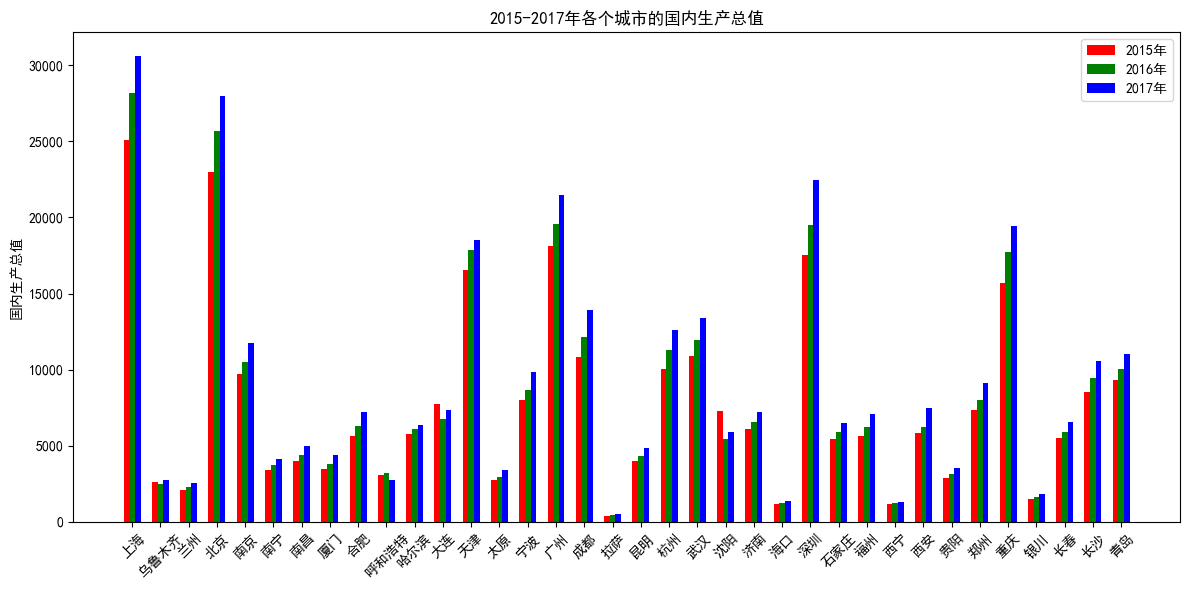

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体，避免图表中文显示异常
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 1. 读取并合并所有CSV文件数据
file_paths = ["2015年国内主要城市年度数据.csv", 
              "2016年国内主要城市年度数据.csv", 
              "2017年国内主要城市年度数据.csv"]

# 用于存储合并后的数据
all_data = pd.DataFrame()
for file in file_paths:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df], ignore_index=True)

# 2. 绘制2015 - 2017年各个城市的国内生产总值的直方图，横坐标为城市
# 按城市和年份分组求和（假设同一城市每年可能有多条记录，这里取总和，可根据实际情况调整）
gdp_by_city_year = all_data.pivot_table(index='地区', columns='年份', values='国内生产总值', aggfunc='sum')

# 提取 2015、2016、2017 年数据
gdp_2015 = gdp_by_city_year[2015]
gdp_2016 = gdp_by_city_year[2016]
gdp_2017 = gdp_by_city_year[2017]

x = np.arange(len(gdp_by_city_year.index))  # 城市数量对应的横坐标
width = 0.2  # 每个直方图柱子的宽度

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, gdp_2015, width, label='2015年', color='r')
rects2 = ax.bar(x, gdp_2016, width, label='2016年', color='g')
rects3 = ax.bar(x + width, gdp_2017, width, label='2017年', color='b')

# 设置横坐标为城市名称
ax.set_xticks(x)
ax.set_xticklabels(gdp_by_city_year.index, rotation=45)

ax.set_ylabel('国内生产总值')
ax.set_title('2015-2017年各个城市的国内生产总值')
ax.legend()

# 自动调整布局，避免城市名称显示不全
plt.tight_layout()
plt.show()


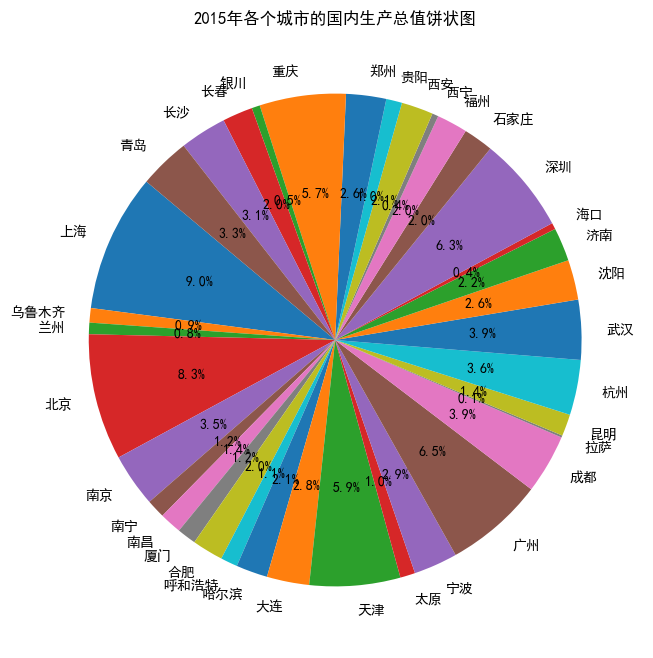

In [3]:
# 3. 绘制2015年各个城市的国内生产总值的饼状图
# 提取2015年数据
gdp_2015 = all_data[all_data['年份'] == 2015].pivot_table(index='地区', values='国内生产总值', aggfunc='sum')

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gdp_2015['国内生产总值'], labels=gdp_2015.index, autopct='%1.1f%%', startangle=140)
ax.set_title('2015年各个城市的国内生产总值饼状图')

plt.show()